In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import math

i)

We want to sample from the one-dimensional exponential distribution $X \sim Exp(\lambda)$, where $\lambda = 2$. Let us start by determining $U(q) = -\log(f(q))$, where $f(q)$ is the density function of the target distribution.

Thus in our case: 

$$ U(q) = -\log(\lambda e^{-\lambda q}) = -\log(e^{\log(\lambda) - \lambda q}) $$
$$ = - (\log(\lambda) - \lambda q) = \lambda q - \log(\lambda)$$

ii) The minimal form of $U(q)$ is the following $U(q) = \lambda q$. This is since in HMC we are especially interested in the gradient w.r.t. to $q$ of $U(q)$ and the constant term $-\log(\lambda)$ has no effect on the gradient. Thus we can remove it without affecting the algorithm.

iii) Since the exponential distribution is a "strictly positive distribution" that is random variables which follow the exponential distribution only attain positive values. This means that the distribution support is the positive half of the real line $\mathbb{R}_+ = [0, \infty)$. From this we get a constraint for the lower bound of the q's we sample in HMC: we must have $q \geq 0$, which is implemented in the HMC algorithm implemented below. If $q < 0$ we set $q := 0 + (0 - q) = -q$. In this case there is NO upper constraint $u$.

iv)

In [2]:
def U_q(q, lambda_x=2):
    return lambda_x * q

def HMC(niter=10**6, lambda_x=2, L=25, epsilon=0.1):
    qs = []
    q_0 = 1 # A initial value from the support of Exp(2)
    q = q_0
    for i in range(niter):
        p_0 = np.random.normal()
        p = p_0
        for step in range(1, L+1):
            p = p - (epsilon / 2) * lambda_x # dU(q) / dq = lambda, a constant for all q
            q = q + epsilon * p
            
            # Check the constraint
            if q < 0: # Exp(2) distribution's support is [0, infinity), so lower bound l = 0, but no upper bound
                q = 0 + (0 - q)
                p = -p
            p = p - (epsilon / 2) * lambda_x
        
        p = -p
        U_0 = U_q(q_0)
        K_0 = (p_0 ** 2) / 2
        U_star = U_q(q)
        K_star = (p ** 2) / 2
        
        u = np.random.uniform()
        
        if u < np.exp(U_0 - U_star + K_0 - K_star):
            q = q
            q_0 = q
        else:
            q = q_0
            q_0 = q_0
        qs.append(q)
        
    return qs

In [3]:
simulated_exponential = HMC()

In [4]:
def exponential_density(x, lambda_x=2):
    return lambda_x * np.exp(-lambda_x * x)

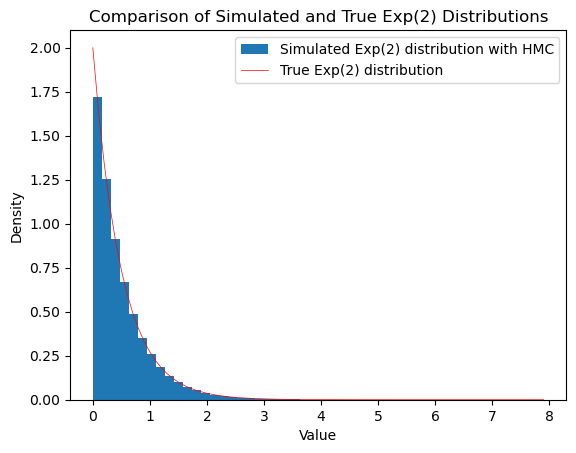

In [5]:
plt.hist(simulated_exponential, bins = 50, density='true', label="Simulated Exp(2) distribution with HMC")
x_axis = np.arange(0,8,0.1)
true_gamma_distribution = [exponential_density(x) for x in x_axis]
plt.plot(x_axis, true_gamma_distribution, 'r', linewidth=0.5, label="True Exp(2) distribution")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Comparison of Simulated and True Exp(2) Distributions")
plt.show()

v) I used $\epsilon = 0.1$ as instructed.